<img src="../logo_UTN.svg" align="right" width="150" /> 

# Teoría De Circuitos 2

# Trabajo Semanal Nº4
#### Federico Borello

### Consigna

A partir de la función transferencia de la topología Ackerberg-Mossberg de la TS3:

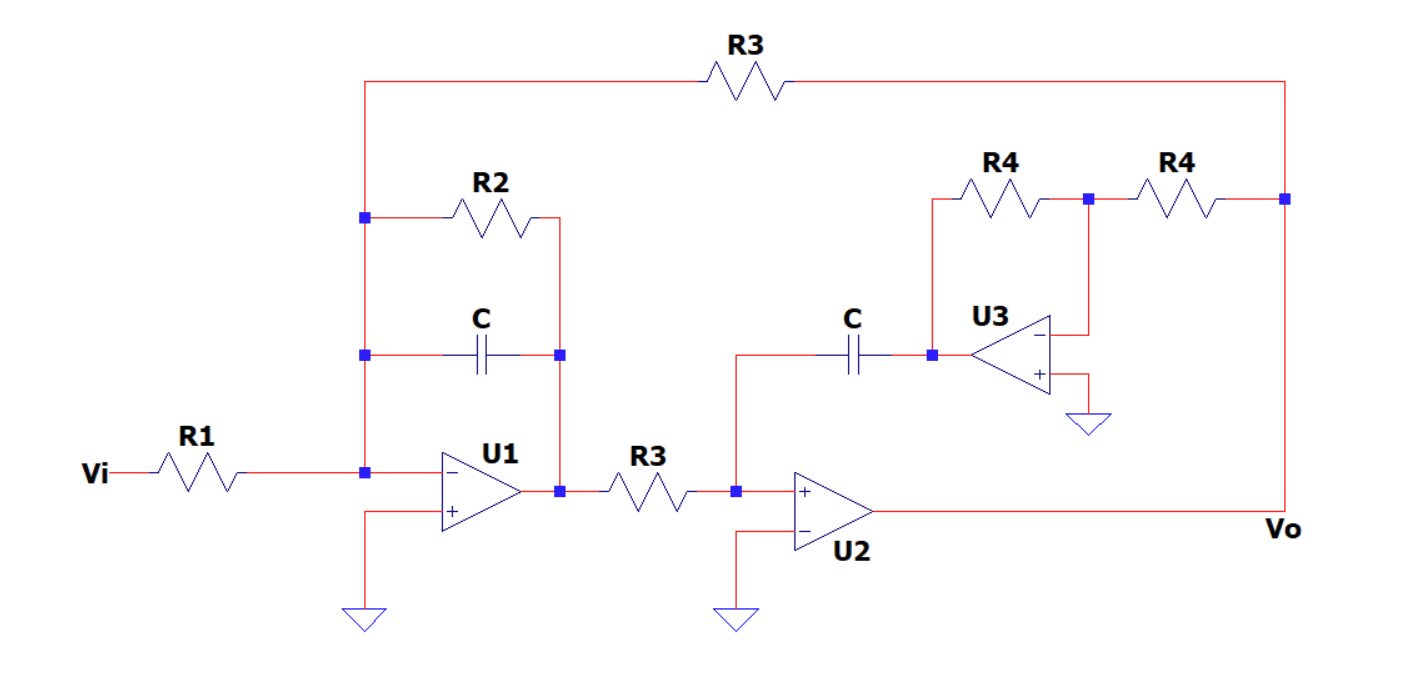

👉 01. Obtenga la función transferencia normalizada T(s) de manera que la máxima distorsión de módulo, αmáx, sea de 1 dB, utilizando los conceptos de partes de función e indique los valores de ϵ, factor de ripple y n, orden del filtro. Recordar que:

$$
|T(j\omega)|^2 = T(j\omega) \cdot T(-j\omega) = T(s) \cdot T(-s) |_{s = j\omega}
$$

👉 02. Dibuje a mano la respuesta en frecuencia (módulo y fase) y el diagrama de polos y ceros de la función transferencia normalizada $T(s)$
. Realice el estudio en los extremos de banda y en $\omega_0$

👉 03. Realice la simulación numérica en Python, y circuital, en LTSpice de la función transferencia normalizada $T(s)$. ¿Se trata de un filtro Butterworth?.

**Bonus:**

+10 💎 Proponga un planteo alternativo al del inciso 01. Sugerencia: Ver Schaumann, R. - Van Valkenburg, Mac E., Design of Analog Filters, Capítulo 6: Lowpass Filters with Maximally Flat Magnitude. Sección 6.4: Lowpass Filters Specifications. Página 264.

+10 ⚽️ Simulación numérica en Python y circuital en LTSpice.

+10 🍺 Presentación en Jupyter Notebook


In [1]:
from IPython.display import HTML

file = "./TS4_handwritten.pdf"
html = f"""
<div style="text-align:center;">
    <iframe src="{file}" width="900" height="600"></iframe>
</div>
"""
HTML(html)

In [2]:
# SetUp - Import /utils module
import sys
import os

sys.path.append(os.path.abspath(".."))
import utils.plot as uplt

# Import common packages
from IPython.display import display, Markdown
import sympy as sp
import numpy as np

# Analisis del circuito

Se utiliza la transferencia obtenida en la TS3.

$$
H(s) = - \frac{R_3}{R_1} \;  \cfrac{\frac{1}{{R_3}^2 \, C^2}}{s^2 + s \, \frac{1}{R_2\, C} + \frac{1}{{R_3}^2 \, C^2}}
$$

Por lo tanto se tiene la siguiente expresión simplificada:

$$
H(s) = - k \;  \cfrac{{\omega_0}^2}{s^2 + s \, \frac{\omega_0}{Q} + {\omega_0}^2}
$$

Siendo los parámetros característicos del filtro:
- $k = \frac{R_3}{R_1}$
- $\omega_0 =  \frac{1}{R_3 \, C}$
- $Q =  \frac{R_2}{R_3}$

## Caso de Estudio

Se pide un $\alpha_{max} = 1[dB]$, se calcula a mano los parámetros requeridos para cumplir lo requerido. (se adjunta PDF al principio del documento).

Los pasos a seguir, de manera resumida, se basa en las siguientes expresiones:

$$T(s) = \cfrac{b}{s^2 + s a  + b^2}$$

$$\cfrac{\frac{1}{\epsilon^2}}{s^4 + \frac{1}{\epsilon^2}} = T(s) \, T(-s) = \cfrac{b}{s^2 + s a  + b^2}  \cfrac{b}{s^2 - s a  + b^2}$$

Y se obtiene que:

- $b = \frac{1}{\epsilon}$
- $a = \sqrt{2 \, b}$


Además, el $\epsilon$ se relaciona con el $\alpha_{max}$, la cual es la única restricción según la consigna.


Realizando los cálculos e igualaciones se llega a la siguiente función transferencia:

$$
H(s) = \;  \cfrac{1.4^2}{s^2 + s \sqrt{2} \; 1.4 + 1.4^2}
$$

Siendo el factor de ripple igual a $\epsilon = 0.508$ . Y $n$ = 2.


Se realiza un análisis del módulo, fase y diagrama de polos y ceros reconstruyendo la transferencia con Sympy:

In [3]:
R1, R2, R3, C = sp.symbols("R_1 R_2 R_3 C", real=True, positive=True)
w0, Q, k = sp.symbols("\omega_0 Q k", real=True, positive=True)
s = sp.symbols("s")

# Defino la transferencia T(s)
num = w0**2
den = s**2 + s * w0 / Q + w0**2
T = k * (num / den)

T

\omega_0**2*k/(\omega_0**2 + s**2 + \omega_0*s/Q)

## Normalización

$N_{\omega_0} = \omega_0 $
$N_{Z} = R_1 $

Para simplificar, $R_1 = 1$

Quedando con la siguiente transferencia:

$$
H(s) = - R_3 \;  \cfrac{1}{s^2 + s \, \frac{1}{R_2} + 1}
$$

Siendo los parámetros característicos del filtro:
- $k = R_3$

- $\omega_0 =  \frac{1}{k \, C}$

- $Q =  \frac{R_2}{k}$

Se requiere cumplir con los siguientes valores para lograr con la transferencia deseada:

- $k = 1$
  
- $Q = \frac{1}{\sqrt{2}}$

## Gráfico de Modulo y Fase

Para graficar de manera sencilla y visualizar de manera cualitativa el comportamiento del filtro, se utilizan resistores de valor unitario.

Para settear $\omega_0$, se utiliza $C(\omega_0)$ y se impone una frecuencia de $10 kHz$. Como $R_3 == R_1$, $k = 1$. $Q = 1$ ya que los resistencias son de $1$.

> Por el gráfico, se observa que el circuito se comporta como un **pasabajos**, pero **NO** se trata de un filtro Butterworth debido a que hay una $\omega_0$ de $1.4$, la cual puede distinguirse de la normalizacioón habitual si la denominamos $\omega_{Butter} = 1.4$


### Transferencia

$$H(s) = - \frac{7737769850.45406}{s^{2} + 62200.3611342171 s + 7737769850.45406}$$


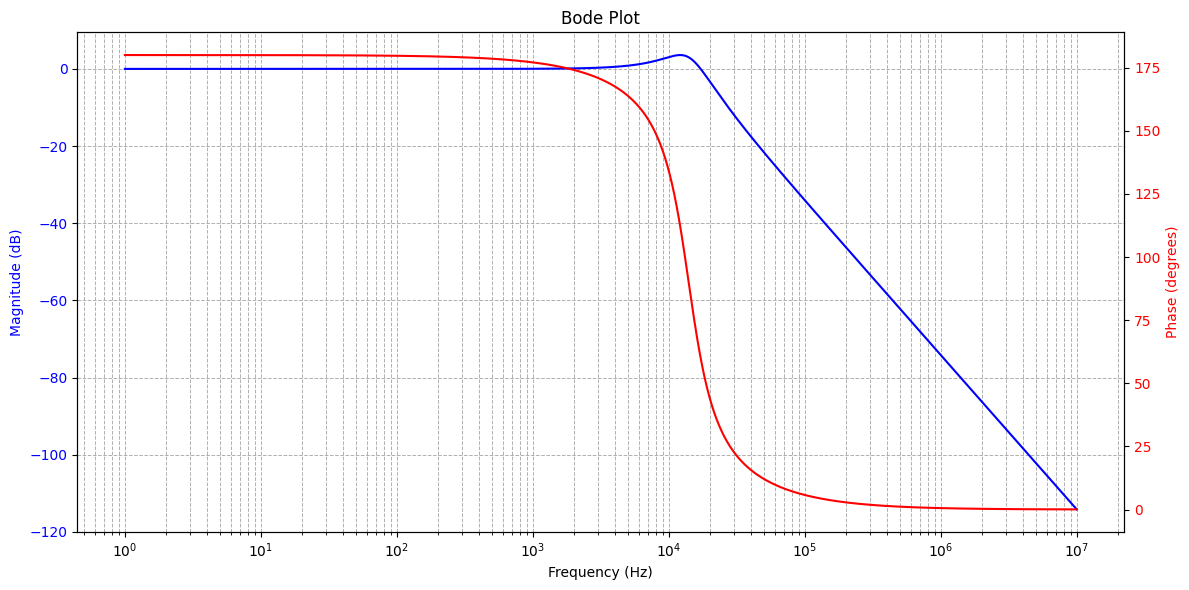


Ganancia en $\omega_{Butter}$ 3.017[dB] || Approx Q (0.707) veces.


In [4]:
k_expr = -R3 / R1
w0_expr = 1 / (R3 * C)
Q_expr = R2 / R3

values = {k: k_expr, Q: Q_expr, w0: w0_expr}

f = 10e3
w_butter = 1.4
_w0 = 2 * np.pi * 10e3 * w_butter

T = T.subs(values)

Q = 1 / (2) ** (1 / 2)
values = {C: 1 / (_w0 * 1), R1: 1, R2: Q ** (-1), R3: 1}

(magnitude_db, frequencies, _) = uplt.plot_tf(T, values)

idx = np.argmin(np.abs(frequencies - w_butter * 1e4))
magnitude_at_w0 = magnitude_db[idx]

markdown_text = rf"""
Ganancia en $\omega_{{Butter}}$ {magnitude_at_w0:.3f}[dB] || Approx Q ({Q:.3f}) veces.
"""

display(Markdown(markdown_text))

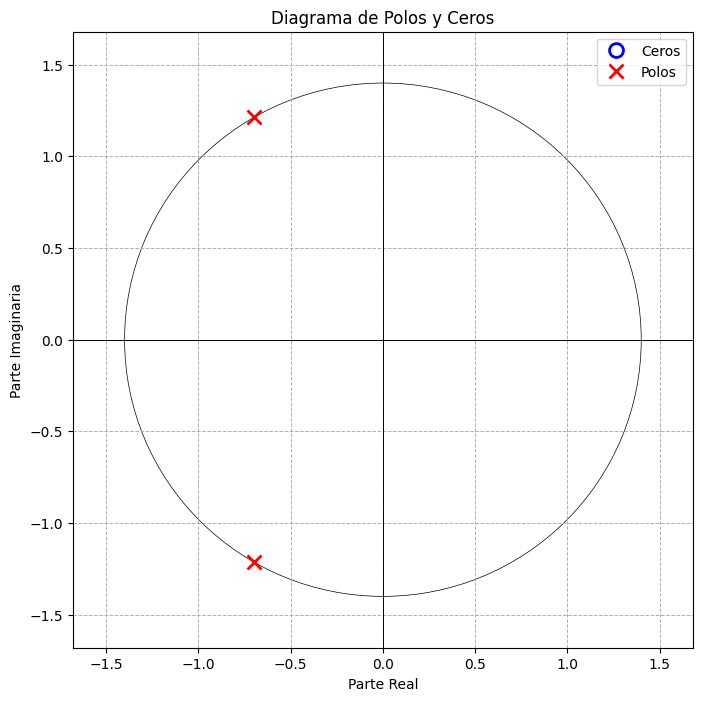

In [5]:
_w0 = 1.4
values = {C: 1 / (_w0 * 1), R1: 1, R2: 1, R3: 1}

_ = uplt.plot_polos_ceros(T, _w0, values)

Se observa que los polos forman parte de una circunferencia con radio igual a $\omega_{Butter}$ y el diagrama de módulo y fase está desfasado con respecto a la $f_0 = 10 [kHz]$ utilizada en los cálculos con python.

Además, en el gráfico de fase hecho a mano, se realizó un gráfico de manera genérica que cumpla con la especificación y no se tuvo en cuenta el desfasaje de $180^{\circ}$ que produce el circuito.

### Simulación con LT Spice

Circuito:

<div align=center>

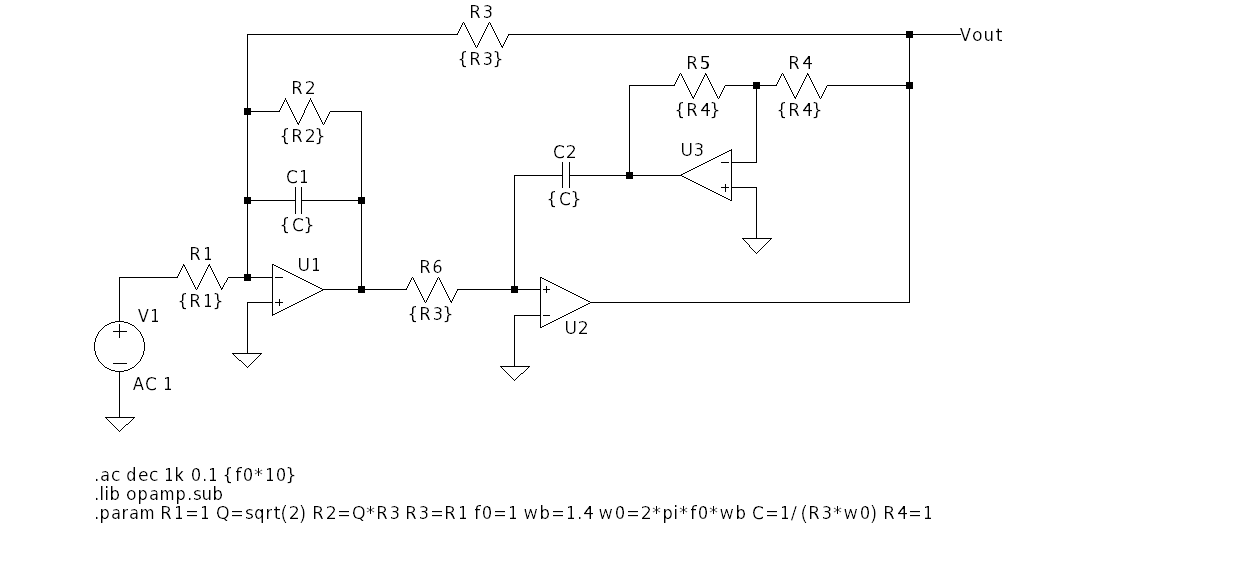

</div>

Módulo y Fase:

<div align=center>

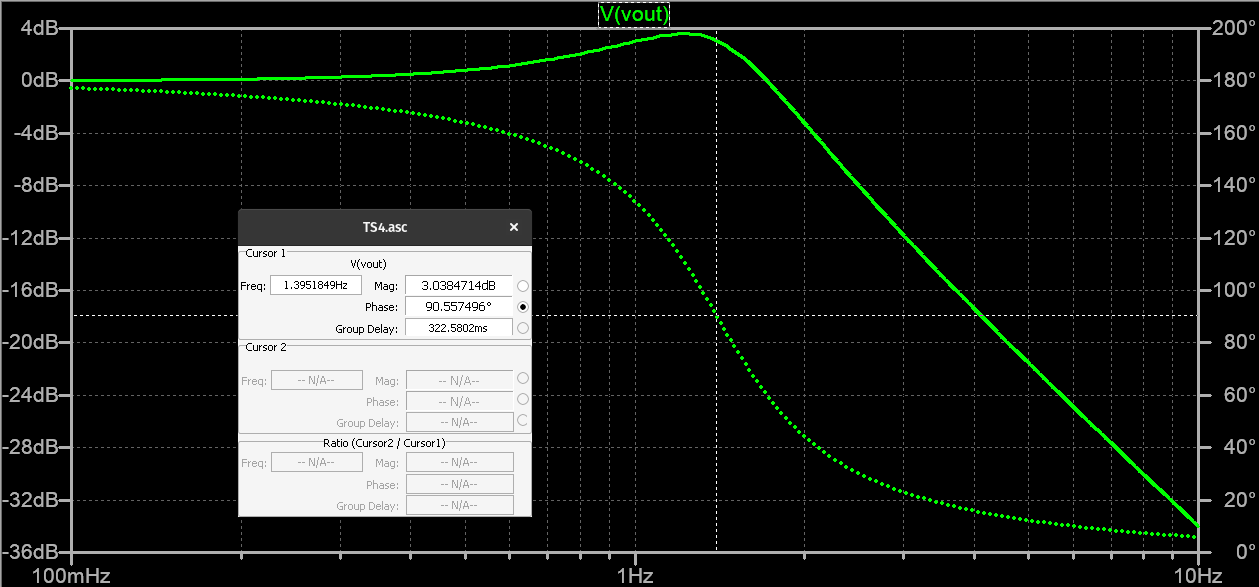

</div>

<a href="./TS4.asc" download="TS4.asc">Descargar TS4.asc</a>

## Butterworth

Luego de todo el análisis, se puede observar que no se trata de un filtro Butterworth, es un filtro con una "escala" extra que se denomina $\omega_{Butter}$. Según Schaumann, R. - Van Valkenburg, Mac E., Design of Analog Filters, Capítulo 6: Lowpass Filters with Maximally Flat Magnitude. Sección 6.4: Lowpass Filters Specifications. Página 264. Podemos utilizar una transferencia butter y luego multiplicar la norma en frecuencia por $\omega_{Butter}$. Si elegimos una norma en frecuencia igual a 1, se vuelve muy sencillo operar de esta forma.

Siguiendo el procedimiento del Schaumann:

$$
\omega_{Butter} = \epsilon^{\frac{-1}{n}} \; N_{\omega}
$$

Si la norma en frecuencia es 1, es muy sencillo operar. Luego se escala todo con la siguiente norma: $N_{\omega} = 2 \pi \, f_0 \, \omega_{butter}$ para "trasladar" el comportamiento del circuito a $f_0$. Lo cual ya fue utilizado en este Notebook por simplicidad.

In [6]:
from scipy.signal import butter, TransferFunction

# Se puede utilizar la funcion butter de scipy.signal con w = 1 para tener los coeficientes
# "canonicos" de butterworth según el orden y luego escalar los componentes con w_butter
N = 2
w = 1
b, a = butter(N, w, btype="low", analog=True, output="ba")

tf = TransferFunction(b, a)
s = sp.symbols("s")
B = sum(coef * s**i for i, coef in enumerate(reversed(b)))
A = sum(coef * s**i for i, coef in enumerate(reversed(a)))

print("Butter Canónico:")
display(B / A)

# Se pueden "escalar" los coeficientes automaticamente.
w_butter = 1.4
b, a = butter(N, w_butter, btype="low", analog=True, output="ba")

tf = TransferFunction(b, a)
B = sum(coef * s**i for i, coef in enumerate(reversed(b)))
A = sum(coef * s**i for i, coef in enumerate(reversed(a)))

print("Butter 'desplazado':")
display(B / A)

Butter Canónico:


1.0/(1.0*s**2 + 1.4142135623731*s + 1.0)

Butter 'desplazado':


1.96/(1.0*s**2 + 1.97989898732233*s + 1.96)